In [8]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [23]:
(x_train , y_train ) , (x_test , y_test )  =mnist.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
y_train.shape

(60000,)

In [27]:
single_img = x_train[1]

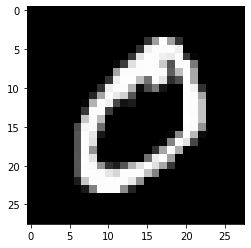

In [28]:
plt.imshow(single_img,cmap="gray")

#### One hot encodding -tocategor

In [29]:
from keras.utils.np_utils import to_categorical

In [30]:
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,num_classes=10)

In [31]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Normalize

In [36]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [37]:
scaled_one_img = x_train[0]

In [39]:
scaled_one_img[:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Reshaping adding color dim



In [40]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


In [42]:
x_train.shape

(60000, 28, 28, 1)

In [45]:
from keras.models import Sequential

from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
##CONV LAYER
model.add(Conv2D(64, kernel_size=3, input_shape=(28,28,1),activation = "relu"))
##
model.add(Conv2D(32, kernel_size=3, activation = "relu"))

model.add(Flatten())

model.add(Dense(10, activation = "softmax"))



In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(x_train,y_cat_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1292 - accuracy: 0.9614
Epoch 2/3
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0488 - accuracy: 0.9844
Epoch 3/3
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0322 - accuracy: 0.9892


In [52]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 5s 473us/step


[0.04177960943393409, 0.9861999750137329]

In [63]:
from sklearn.metrics import confusion_matrix , accuracy_score,classification_report

In [54]:
prediction = model.predict_classes(x_test)

In [61]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
confusion_matrix(y_test , prediction)
accuracy_score(y_test , prediction)

0.9862